In [126]:
import os, json, re
import matplotlib.pyplot as plt

%matplotlib widget

def lmap(f, iter):
    return list(map(f, iter))


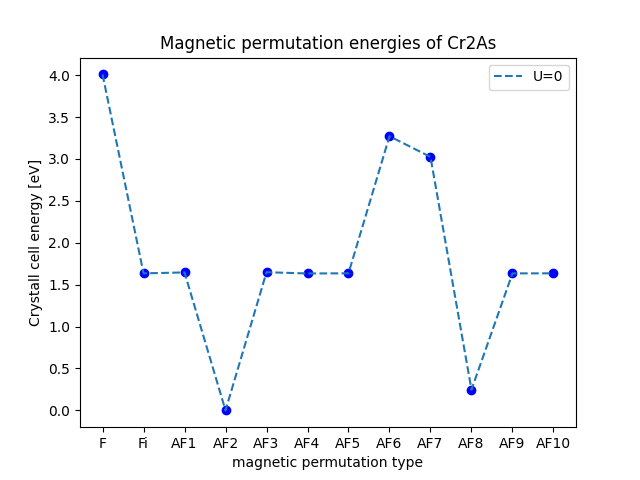

In [127]:
plt.figure()
plt.title("Magnetic permutation energies of Cr2As")
plt.xlabel("magnetic permutation type")
plt.ylabel("Crystall cell energy [eV]")

mag_opts = ["F","Fi","AF1","AF2","AF3","AF4","AF5","AF6","AF7","AF8","AF9","AF10"]
for mypath in [
    # "mn2as_mag_permuts_results",
    # "cr2as_mag_permuts_results",
    # "mn2as_mag_permuts_results_U=0",
    # "fe2as_mag_permuts_results_U=0",
    "cr2as_mag_permuts_results_U=0",
    # "cr2as_mag_permuts_results_U=2",
    # "cr2as_mag_permuts_results_U=3",
    # "cr2as_mag_permuts_results_U=4",
]:
    mat = mypath.split("_")[0]
    u = mypath.split("_")[-1]

    onlyfiles = [
        f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))
    ]

    jsons = []
    for file in onlyfiles:
        with open(os.path.join(mypath, file), "r+") as reader:
            jsons.append(json.load(reader))
    jsons.sort(
        key=lambda d: mag_opts.index(d["name"].split('_')[0])
    )
    
    xs = []
    ys = []
    min_ene = min(lmap(lambda dat: dat["results"]["MM_tot"], jsons))
    for dat in jsons:
        xs.append(dat["name"].split('_')[0])
        ys.append(float(dat["results"]["MM_tot"]) - min_ene)

        plt.scatter(xs[-1], ys[-1], c = "b" if dat["diagnostics"]["status"] == "success" else "r")

    plt.plot(xs, ys, "--", label={u})
    # plt.scatter(xs, ys)

plt.legend()


In [128]:
text = ""
dat = {}
for u in [0,2,3,4]:
    for mat in ["mn2as", "fe2as", "cr2as"]:
        mypath = f"{mat}_mag_permuts_results_U={u}"
        onlyfiles = [
            f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))
        ]
        for file in onlyfiles:
            with open(os.path.join(mypath, file), "r+") as reader:
                _json=json.load(reader)
                dat[f"{u}_{_json['name'].split('_')[0]}_{mat}"] = _json

for u in [0,2,3,4]:
    for mg_opt in mag_opts:
        text += f"{mag_opts.index(mg_opt) - 1}, {u}"
        for mat in ["mn2as"]:
            _json = dat[f"{u}_{mg_opt}_{mat}"]
            text += f", {_json['results']['energy_per_cell_eV']}"
        text += "\n"
with open("mag_permuts_results.csv", "w") as writer:
    writer.write(f"Magnetic parmutaion, U [eV], Mn2As (E per 6 atoms in [eV]), Fe2As (E per 6 atoms in [eV]), Cr2As (E per 6 atoms in [eV])\n{text}")